In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import patches
from PIL import Image

In [2]:
class DeepLontarDataset(torch.utils.data.Dataset):
	"""
	Data pipeline class that reads images and its labels/annotations in YOLO format.
	All files are name in the following format:
	- JPEG images: <filename> .jpg, for instance: 1a.jpg, and
	- TXT annotations: <filename> .txt, for instance: 1a.txt
	Annotation files format using YOLO format, as follows:
	- <ID> <x> <y> <width> <height> for intance: 54 0.0068000 0.0833333 0.0160000 0.0733333, 
	where :
		- <ID> is the object class ID
		- <x> is x coordinate
		- <y> is y coordinate
		- <width> is width of the bounding box
		- <height> is height of the bounding box
	""" 
	def __init__(self, image_dir, label_dir):
		self.image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')])
		self.label_paths = sorted([os.path.join(label_dir, fname) for fname in os.listdir(label_dir) if fname.endswith('.txt')])

	def __len__(self):
		return len(self.image_paths)

	def __getitem__(self, idx):
		image_path = self.image_paths[idx]
		label_path = self.label_paths[idx]

		with open(label_path, 'r') as f:
			lines = f.readlines()
		
		boxes = []
		for line in lines:
			parts = line.strip().split()
			class_id = int(parts[0])
			x, y, width, height = map(float, parts[1:])
			xmin = (x - width / 2)
			ymin = (y - height / 2)
			xmax = (x + width / 2)
			ymax = (y + height / 2)
			boxes.append([xmin, ymin, xmax, ymax, class_id])

		# print(boxes)
		image = Image.open(image_path).convert('RGB')
		
		return image, boxes

In [5]:
# Change to dataset path
data_root_dir = '/Users/rudyhendrawan/miniforge3/datasets/DeepLontar-Dataset'
image_dir = os.path.join(data_root_dir, 'images')
label_dir = os.path.join(data_root_dir, 'labels')

dataset = DeepLontarDataset(image_dir=image_dir, label_dir=label_dir)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

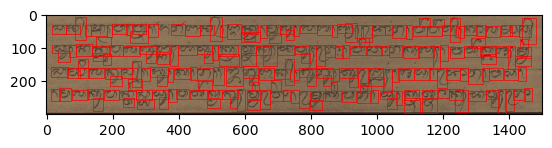

In [8]:
# Function that can be used to visualize the dataset with its annotations
def visualize_dataset(dataset, idx):
	image, boxes = dataset[idx]
	image = np.array(image)
	fig, ax = plt.subplots(1)
	ax.imshow(image)
	for box in boxes:
		xmin, ymin, xmax, ymax, class_id = box
		# Scaling the bounding box to the image size so that it can be visible on the image
		xmin = xmin * image.shape[1]
		ymin = ymin * image.shape[0]
		xmax = xmax * image.shape[1]
		ymax = ymax * image.shape[0]
		width = xmax - xmin
		height = ymax - ymin
		bbox = plt.Rectangle((xmin, ymin), width, height, linewidth=0.5, edgecolor='r', facecolor='none')
		ax.add_patch(bbox)
		# ax.text(xmin, ymin, f'{class_id}', fontsize=10, color='r')

	plt.show()

# Visualize the dataset
visualize_dataset(dataset, 100)